In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_excel(r"C:\Users\User\Downloads\knn_fruit_data.xlsx")
with pd.option_context('display.max_rows', 8): display(df)
x = df[['width', 'height', 'mass', 'color_score']]
y = df['fruit_name']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# scaling after splitting
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
# Training model
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train_sc, y_train)

,width,height,mass,color_score,fruit_name
0,8.4,7.3,192,0.55,apple
1,6.2,4.7,86,0.80,mandarin
2,6.0,4.6,84,0.79,mandarin
3,8.0,6.8,180,0.59,apple
...,...,...,...,...,...
55,6.1,8.1,118,0.70,lemon
56,7.6,8.2,180,0.79,orange
57,7.2,7.2,154,0.82,orange
58,7.2,10.3,194,0.70,lemon


KNeighborsClassifier()

In [6]:
x_pred = [[7.5, 7.5, 175, 0.75]]
x_pred_sc = scaler.transform(x_pred)
y_pred = model.predict(x_pred_sc)
w = x_pred[0][0]
h = x_pred[0][1]
m = x_pred[0][2]
c = x_pred[0][3]
f = y_pred[0]
print('K =', k)
print('Prediction:')
print(f'width: {w}, height: {h}, mass: {m}, ', end='')
print(f'color score {c} => fruit: {f}')
print()
print('Accuracy:', '{:.2f}'.format(model.score(x_test, y_test)))

K = 5
Prediction:
width: 7.5, height: 7.5, mass: 175, color score 0.75 => fruit: orange

Accuracy: 0.47


c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\Desktop\test\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [8]:
import matplotlib.pyplot as plt

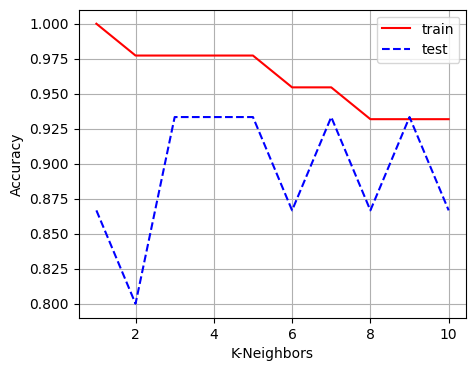

In [11]:
acc_train = []
acc_test = []
n_neighbors = range(1, 11) #1 - 10 len(y)
for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_sc, y_train)
    acc_train.append(model.score(x_train_sc, y_train))
    acc_test.append(model.score(x_test_sc, y_test))
    
plt.figure(figsize=(5, 4))
plt.plot(n_neighbors, acc_train, 'r-', label='train')
plt.plot(n_neighbors, acc_test, 'b--', label='test')
plt.xlabel('K-Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()